Team Members:
- Chenrui Fan
- Xipeng Wang
- Soi Zhi Wen

In [4]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/Privacy/')

# 把数据集也就是DATA.csv放在这个目录下

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import numpy as np

def rp_binary(data: np.array, epsilon: float):

    # Basic implementation
    n_people = data.shape[0]
    n_features = data.shape[1]

    p = epsilon
    private_data = data.copy()
    flip_bits = np.random.choice(2, p=[1 -p, p], size=[n_people, n_features])
    private_data = private_data ^ flip_bits

    # let Sex and Grade between (1,2) and (0,7)
    for i in range(len(private_data)):
      if private_data[i][0] < 1:
        private_data[i][0]  =  1
      elif private_data[i][0] > 2:
        private_data[i][0]  =  2

      if private_data[i][1] < 0:
        private_data[i][1]  =  0
      elif private_data[i][1] > 7:
        private_data[i][1]  =  7

    return private_data

def rp_float(data: np.array, epsilon: np.float, bound: np.array):

    n_people = data.shape[0]
    n_features = data.shape[1]
    private_data = data.copy()
    epsilon_i = epsilon / n_features
    sensitivity = bound

    return private_data

<ipython-input-5-8cd445a2b825>:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  def rp_float(data: np.array, epsilon: np.float, bound: np.array):


In [6]:
def generate_data(T:int,  p_x, p_y_x_1, p_y_x_0):
  p_x = p_x # P(x=1)
  p_y_x = np.zeros(2)
  p_y_x[1]= p_y_x_1 # P(y=1 ¦ x=1) = 0.7, P(y=0 ¦ x=1) = 0.3
  p_y_x[0] = p_y_x_0 # P(y=1 ¦ x=0) = 0.2, P(y=0 ¦ x=0) = 0.8,
  x = np.random.choice(2, p=[1-p_x, p_x], size=T) # choosing 0 or 1, the probility of choosing 0 is 1-p_x, size of array is T
  # x is an array combining of 0 and 1. Value of x[t] determine the p_y_x.
  y = np.array([np.random.choice(2, p=[1 - p_y_x[x[t]], p_y_x[x[t]]]) for t in range(T)]) # y is also an array.
  return np.transpose(np.array((x,y)))

In [7]:
p_x = 0.6
p_y_x_1 = 0.7
p_y_x_0 = 0.2

# P(x=1) = p_x
print("P(x=1) = ", p_x)

# P(y=1) = P(y=1 ¦ x=0) * P(x=0) + P(y=1 ¦ x=1) * P(x=1) = p_y_x_0 * (1 - p_x) + p_y_x_1 * p_x
print("P(y=1) = P(y=1 ¦ x=0) * P(x=0) + P(y=1 ¦ x=1) * P(x=1) = ", p_y_x_0 * (1 - p_x) + p_y_x_1 * p_x)

# P (y = 1|x = 0) = p_y_x_0
print("P (y = 1|x = 0) = ", p_y_x_0)

# P (y = 1|x = 1) = p_y_x_1
print("P (y = 1|x = 1) = ", p_y_x_1)

P(x=1) =  0.6
P(y=1) = P(y=1 ¦ x=0) * P(x=0) + P(y=1 ¦ x=1) * P(x=1) =  0.5
P (y = 1|x = 0) =  0.2
P (y = 1|x = 1) =  0.7


In [8]:
import matplotlib.pyplot as plt

In [9]:
means_x, means_y = np.transpose([np.mean(rp_binary(generate_data(10, 0.6, 0.7, 0.2), p), axis=0 ) for p in np.arange(0, 1, 0.01)])
means_all = means_x + means_y

Text(0.5, 1.0, 'means_y by p')

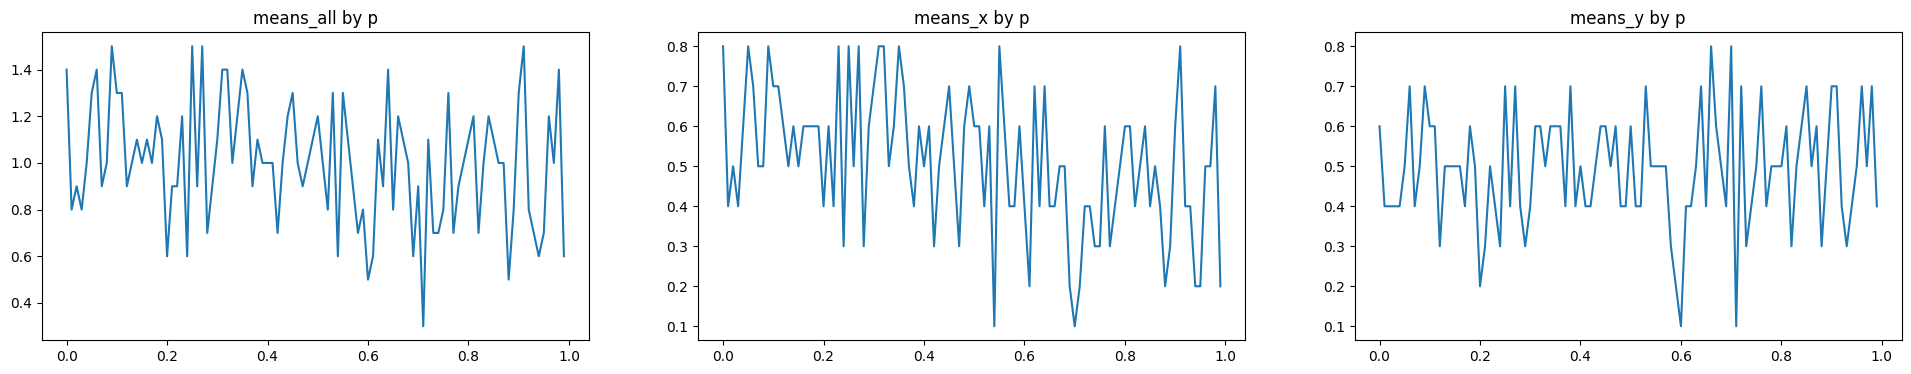

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(24, 4))

axes[0].plot(np.arange(0, 1, 0.01), means_all)
axes[0].set_title('means_all by p')

# only print x by diffirent p:
axes[1].plot(np.arange(0, 1, 0.01), means_x)
axes[1].set_title('means_x by p')

# only print y by diffirent p:
axes[2].plot(np.arange(0, 1, 0.01), means_y)
axes[2].set_title('means_y by p')

In [11]:
means_T_x, means_T_y = np.transpose([np.mean(rp_binary(generate_data(t, 0.6, 0.7, 0.2), 1/4), axis=0) for t in np.arange(1, 1000, 1)])
means_T_all = means_T_x + means_T_y

Text(0.5, 1.0, 'means_T_y by T')

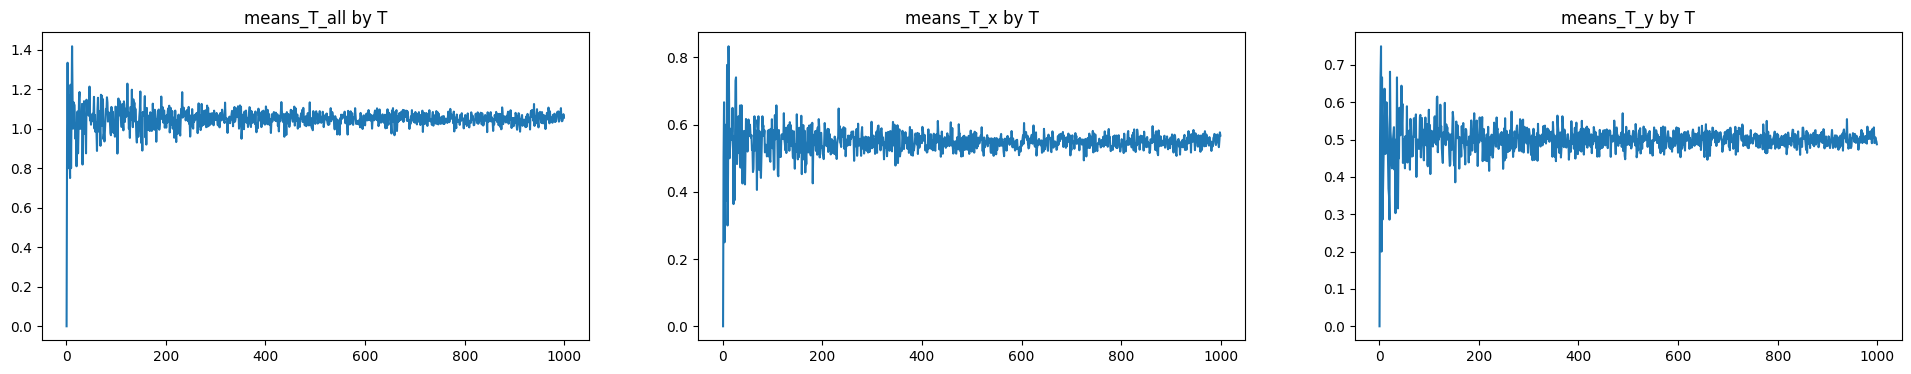

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(24, 4))

axes[0].plot(np.arange(1, 1000, 1), means_T_all)
axes[0].set_title('means_T_all by T')

# only print x by diffirent p:
axes[1].plot(np.arange(1, 1000, 1), means_T_x)
axes[1].set_title('means_T_x by T')

# only print y by diffirent p:
axes[2].plot(np.arange(1, 1000, 1), means_T_y)
axes[2].set_title('means_T_y by T')

# Using data.csv

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [17]:
df = pd.read_csv('DATA.csv')
df.columns = df.columns.astype(str)

data = df[['2', 'GRADE']].to_numpy()

In [26]:
print(data[:10])

[[2 1]
 [2 1]
 [2 1]
 [1 1]
 [2 1]
 [2 2]
 [2 5]
 [1 2]
 [1 5]
 [1 0]]


In [31]:
data_RP = rp_binary(data, 0.1)

print(data_RP[:10])

[[2 1]
 [2 1]
 [3 1]
 [1 1]
 [2 1]
 [2 3]
 [2 5]
 [1 2]
 [1 5]
 [1 0]]


In [21]:
means_x, means_y = np.transpose([np.mean(rp_binary(data, p), axis=0 ) for p in np.arange(0, 1, 0.01)])
means_all = means_x + means_y

Text(0.5, 1.0, 'means_Grade by p')

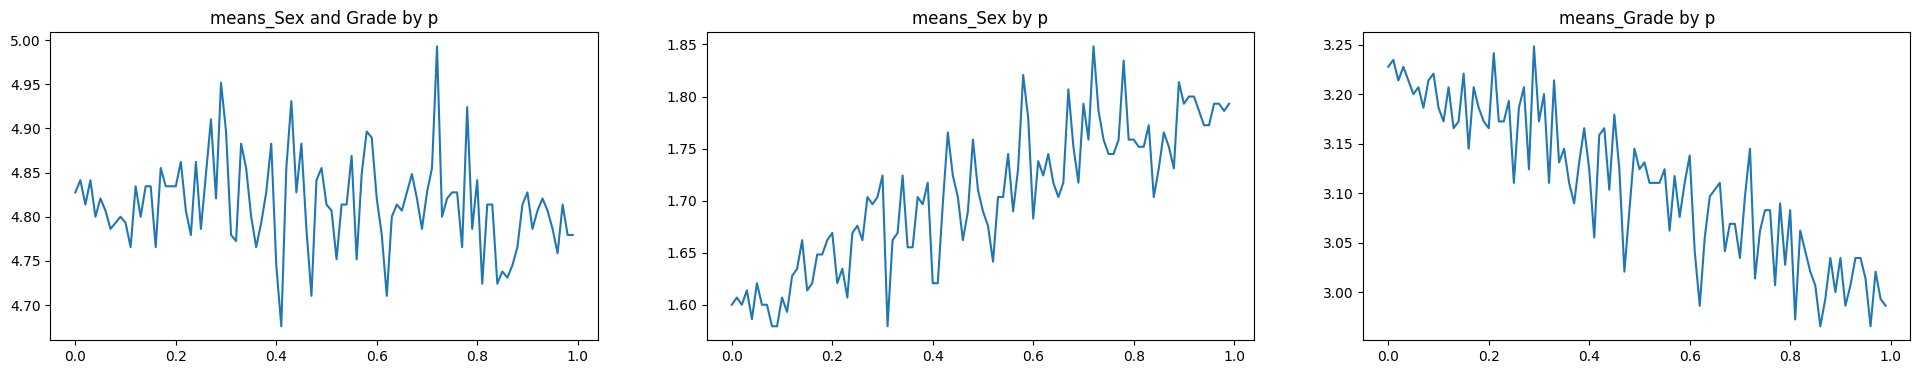

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(24, 4))

axes[0].plot(np.arange(0, 1, 0.01), means_all)
axes[0].set_title('means_Sex and Grade by p')

# only print x by diffirent p:
axes[1].plot(np.arange(0, 1, 0.01), means_x)
axes[1].set_title('means_Sex by p')

# only print y by diffirent p:
axes[2].plot(np.arange(0, 1, 0.01), means_y)
axes[2].set_title('means_Grade by p')

In [19]:
means_T_x, means_T_y = np.transpose([np.mean(rp_binary(data, 1/4), axis=0) for t in np.arange(1, 1000, 1)])
means_T_all = means_T_x + means_T_y

Text(0.5, 1.0, 'means_Grade by T')

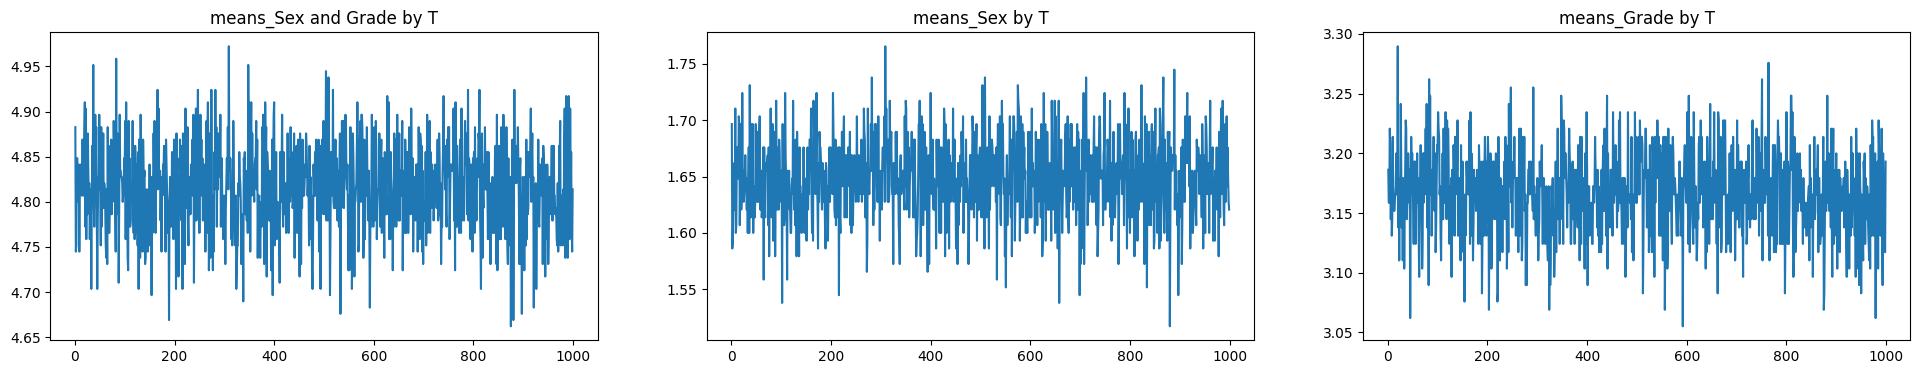

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(24, 4))

axes[0].plot(np.arange(1, 1000, 1), means_T_all)
axes[0].set_title('means_Sex and Grade by T')

# only print x by diffirent p:
axes[1].plot(np.arange(1, 1000, 1), means_T_x)
axes[1].set_title('means_Sex by T')

# only print y by diffirent p:
axes[2].plot(np.arange(1, 1000, 1), means_T_y)
axes[2].set_title('means_Grade by T')